In [1]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import os

In [2]:
#load data
os.chdir('../..')
df=pd.read_csv('./data/csv/phase2_data.csv')
#train logistic regression model with all numerical features
classif = setup(data = df, target = 'label', session_id=123, train_size=0.7,numeric_features=['ID','OD','IDW','ODW','LCC','AC','BC'],silent=True)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(16503, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [3]:
#add balanced accuracy metric
add_metric('balanced_accuracy', 'Balanced Accuracy', balanced_accuracy_score, greater_is_better=True)

#Add specificity metric
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity
    
add_metric('specificity', 'Specificity', specificity_score, greater_is_better=True)



Name                                                    Specificity
Display Name                                            Specificity
Score Function       <function specificity_score at 0x7f560aff5820>
Scorer                               make_scorer(specificity_score)
Target                                                         pred
Args                                                             {}
Greater is Better                                              True
Multiclass                                                     True
Custom                                                         True
Name: specificity, dtype: object

In [4]:
#logistic regression without penalization
lr = create_model('lr',penalty='none',class_weight='balanced')
#Save 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Specificity
Fold,,,,,,,,,
0,0.1514,0.9983,1.0000,0.0020,0.0041,0.0006,0.0175,0.5750,0.1499
1,0.1687,0.9931,1.0000,0.0021,0.0041,0.0007,0.0186,0.5836,0.1672
2,0.2130,0.9957,1.0000,0.0011,0.0022,0.0005,0.0153,0.6062,0.2123
3,0.1948,1.0000,1.0000,0.0011,0.0021,0.0004,0.0144,0.5971,0.1941
4,0.1957,0.9965,1.0000,0.0011,0.0021,0.0004,0.0145,0.5975,0.1950
5,0.1896,0.9974,1.0000,0.0011,0.0021,0.0004,0.0142,0.5945,0.1889
6,0.1835,0.1049,0.0000,0.0000,0.0000,-0.0017,-0.0619,0.0919,0.1837
7,0.1766,0.0477,0.0000,0.0000,0.0000,-0.0017,-0.0634,0.0884,0.1768
8,0.1983,0.0676,0.0000,0.0000,0.0000,-0.0017,-0.0590,0.0992,0.1984


In [15]:
#LR results
conf=confusion_matrix(predictionss['label'],predictionss['Label'])
tp=conf[1][1]
tn=conf[0][0]
fp=conf[0][1]
fn=conf[1][0]
recall=tp/(tp+fn)
specificity=tn/(tn+fp)
balanced_accuracy=(recall+specificity)/2
print('balanced accuracy: ',balanced_accuracy)
print('recall: ',recall)
print('specificity: ',specificity)

balanced accuracy:  0.44761037383988206
recall:  0.7142857142857143
specificity:  0.1809350333940498


In [22]:
max_features=[1,2,3,4,5,6]
max_depth=[1,2,3,4,5,6]
n_estimators=[10] #Apparently not changing nothing relevant so kept to 100
#create dataframe for storing results
results=pd.DataFrame(columns=['max_features','max_depth','n_estimators','recall','specificity','balanced_accuracy','tp','tn','fp','fn'])
for feat in max_features:
    for depth in max_depth:
        for est in n_estimators:
            rf=create_model('rf',max_features=feat,max_depth=depth,n_estimators=est,class_weight='balanced')
            #To train on unbalanced data use class_weight='balanced'
            predictions = predict_model(rf)
            result=confusion_matrix(predictions['label'], predictions['Label'])
            tp=result[1][1]
            fp=result[0][1]
            tn=result[0][0]
            fn=result[1][0]
            recall=tp/(tp+fn)
            specificity=tn/(tn+fp)
            balanced_accuracy=(recall+specificity)/2
            #store results
            results=results.append({'max_features':feat,'max_depth':depth,'n_estimators':est,'recall':recall,'specificity':specificity,'balanced_accuracy':balanced_accuracy,'tp':tp,'tn':tn,'fp':fp,'fn':fn},ignore_index=True)
    


#Steps:
#1. Create a grid with rf hyperparameters for number of trees, number of features mtry 
# and depth(important according to an article)
#max_features:2,4,6 
#max_depth:(4) 
#n_estimators: (4)
#2. Calculate harpo metrics for each of them: 
    #A_ Use predictor trained and estimate the original dataset without labels
    #B_ Compare labels and calculate tp,fp,tn,fn
    #C_ Calculate harpo metrics.
    #D_ Save them in a dataframe ordered or in 2D grids.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9932,0.9951,0.5000,0.1111,0.1818,0.1798,0.2335
1,0.9894,0.9951,0.5000,0.0714,0.1250,0.1227,0.1861
2,0.9985,0.9818,0.0000,0.0000,0.0000,-0.0008,-0.0008
3,0.9970,0.9985,1.0000,0.2000,0.3333,0.3325,0.4465
4,0.9841,0.4901,0.0000,0.0000,0.0000,-0.0014,-0.0034
5,0.9871,1.0000,1.0000,0.0556,0.1053,0.1040,0.2342
6,0.9848,0.9955,1.0000,0.0476,0.0909,0.0896,0.2166
7,0.9902,0.9951,1.0000,0.1333,0.2353,0.2332,0.3633
8,0.9985,0.7422,0.0000,0.0000,0.0000,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9918,0.7685,0.1429,0.0455,0.0690,0.0660,0.0772


In [ ]:
results

,max_features,max_depth,n_estimators,recall,specificity,balanced_accuracy,tp,tn,fp,fn
0,1.0,1.0,100.0,1.000000,0.891621,0.945811,7.0,2937.0,357.0,0.0
1,1.0,2.0,100.0,1.000000,0.924408,0.962204,7.0,3045.0,249.0,0.0
2,1.0,3.0,100.0,0.714286,0.955070,0.834678,5.0,3146.0,148.0,2.0
3,1.0,4.0,100.0,0.571429,0.969338,0.770383,4.0,3193.0,101.0,3.0
4,1.0,5.0,100.0,0.428571,0.990893,0.709732,3.0,3264.0,30.0,4.0
5,1.0,6.0,100.0,0.285714,0.996357,0.641036,2.0,3282.0,12.0,5.0
6,2.0,1.0,100.0,1.000000,0.881906,0.940953,7.0,2905.0,389.0,0.0
7,2.0,2.0,100.0,1.000000,0.942016,0.971008,7.0,3103.0,191.0,0.0
8,2.0,3.0,100.0,0.857143,0.959624,0.908383,6.0,3161.0,133.0,1.0
9,2.0,4.0,100.0,0.571429,0.974196,0.772812,4.0,3209.0,85.0,3.0


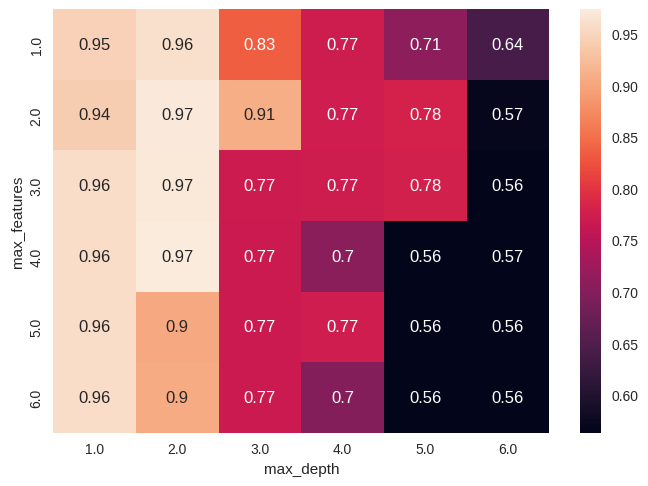

In [ ]:
#A good way to visualize a 2 dimensional grid is to use a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
#Create a pivot table with the results
pivot=results.pivot(index='max_features',columns='max_depth',values='balanced_accuracy')
#Plot the pivot table
sns.heatmap(pivot,annot=True)
plt.show()

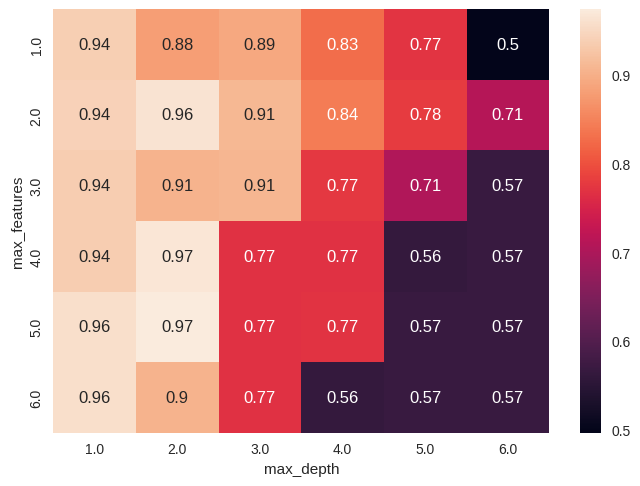

In [23]:
#A good way to visualize a 2 dimensional grid is to use a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
#Create a pivot table with the results
pivot=results.pivot(index='max_features',columns='max_depth',values='balanced_accuracy')
#Plot the pivot table
sns.heatmap(pivot,annot=True)
plt.show()

In [ ]:
results.to_csv('./data/csv/rf_results.csv',index=False)